# Đồ Án Cuối Kỳ

## Link Github: [ở đây](https://github.com/P4DS-19CLC-FinalProject/FinalProject.git)

## Môi trường code

In [1]:
import sys
sys.executable

'/home/uyen_trang/miniconda3/envs/min_ds-env/bin/python'

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import re
import operator
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Thu thập dữ liệu

- Trong bài này, tụi em sẽ dùng dữ liệu đã được thu thập sẵn là file "data.csv" đính kèm
- Đây là dữ liệu về sản phẩm được bán ở website Amazon Ấn Độ. Dữ liệu này được lấy trên Kaggle [ở đây](https://www.kaggle.com/promptcloud/product-listing-from-amazon-india?fbclid=IwAR35mYSniLTkn1ZedNxc_m9UNbuIksUAjAfpTRp9ystlxaZZVOMZIkFNKiI).
- Tác giả: PromptCloud
- License CC0: Public Domain (cho phép sao chép, chỉnh sửa)
- Cách thu thập dữ liệu của tác giả: parse HTML của website và lưu vào file csv


## 2. Khám phá dữ liệu

### Đọc dữ liệu từ file csv

In [3]:
product_df = pd.read_csv('data.csv')
product_df.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Site Name,Offers,Combo Offers,Stock Availibility,Product Asin,Image Urls
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.00,799.00,Amazon In,60.05%,NaN,YES,B072BGHNJ1,https://images-na.ssl-images-amazon.com/images...
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.00,2040.00,Amazon In,0%,NaN,YES,B07QDTZYSJ,https://images-na.ssl-images-amazon.com/images...
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.00,1042.00,Amazon In,42.87%,NaN,YES,B07DCSN8MP,https://images-na.ssl-images-amazon.com/images...
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.00,1399.00,Amazon In,35.97%,NaN,YES,B07GLW9VQN,https://images-na.ssl-images-amazon.com/images...
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594.00,570.00,Amazon In,4.04%,NaN,YES,B07NFYYLF1,https://images-na.ssl-images-amazon.com/images...


### Dữ liệu có bao nhiêu dòng và cột?

In [4]:
num_rows = len(product_df)
num_cols = len(product_df.columns)
num_rows, num_cols

(30000, 15)

### Ý nghĩa của mỗi dòng. Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của sản phẩm từ Web bán hàng Amazon và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của một sản phẩm. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

Ta sử dụng phương thức `duplicated` của dataframe để kiểm tra và lưu vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và ngược lại thì là False

In [5]:
have_duplicated_rows = product_df.duplicated().any()
if have_duplicated_rows:
    print('Có trùng lặp')
else :
    print ('Không trùng lặp')



Không trùng lặp


### Ý nghĩa của mỗi cột

Dưới đây là phần mô tả dữ liệu từ từ Web bán hàng Amazon về các cột trong file "data.csv":
- **Uniq Id**: ID của sản phẩm (ngẫu nhiên)
- **Crawl Timestamp**: Thời điểm thu thập thông tin
- **Category**: Phân loại sản phẩm 
- **Product Title**: Tiêu đề của sản phẩm 
- **Product Description**: Mô tả của sản phẩm 
- **Brand**: Thương hiệu của sản phẩm 
- **Pack Size Or Quantity**: Kích thước của gói hoặc số lượng của 1 sản phẩm 
- **Mrp**: Giá bán lẻ tối đa 
- **Price**: Giá bán thực tế 
- **Site Name**: Trang web bán sản phẩm 
- **Offers**: Giảm giá 
- **Combo Offers**: Các combo ưu đãi được cung cấp bởi người bán 
- **Stock Availibility**: Còn hàng (Nếu còn hàng thì là YES, hết hàng thì là NO) .
- **Product Asin**: ASIN (Amazon Standard Identification Number)là mã sản phẩm do Amazon đánh đấu. Mỗi mã gồm 10 ký từ có chữ và số
- **Image Urls**: Link hình sản phẩm

### Mỗi cột có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `product_df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 


In [6]:
col_dtypes = product_df.dtypes
col_dtypes

Uniq Id                  object
Crawl Timestamp          object
Category                 object
Product Title            object
Product Description      object
Brand                    object
Pack Size Or Quantity    object
Mrp                      object
Price                    object
Site Name                object
Offers                   object
Combo Offers             object
Stock Availibility       object
Product Asin             object
Image Urls               object
dtype: object

### Cột có dtype là object nghĩa là sao?

`product_df` có 15 cột có `dtype` là `object`: "Uniq Id", "Crawl Timestamp", "Category", "Product Title","Product Description", "Brand", "Pack Size Or Quantity", "Mrp", "Price", "Site Name", "Offers", "Combo Offers", "Stock Availibility", "Product Asin", "Product Description", "Image Urls". Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu, ví dụ `type(s.iloc[i])` với `s` là một cột.

Công việc là viết hàm nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này. Trong hàm này, ta sẽ dùng phương thức `apply` của series để xem kiểu dữ liệu của từng giá trị trong cột

In [7]:
def object_type(value):
    return type(value)
def open_object_dtype(s):
    dtypes = set(s.apply(object_type))    
    return dtypes

print('Uniq Id',open_object_dtype(product_df['Uniq Id']))
print('Crawl Timestamp',open_object_dtype(product_df['Crawl Timestamp']))
print('Category',open_object_dtype(product_df['Category']))
print('Product Title',open_object_dtype(product_df['Product Title']))
print('Product Description',open_object_dtype(product_df['Product Description']))
print('Brand',open_object_dtype(product_df['Brand']))
print('Pack Size Or Quantity',open_object_dtype(product_df['Pack Size Or Quantity']))
print('Mrp',open_object_dtype(product_df['Mrp']))
print('Price',open_object_dtype(product_df['Price']))
print('Site Name',open_object_dtype(product_df['Site Name']))
print('Offers',open_object_dtype(product_df['Offers']))
print('Combo Offers',open_object_dtype(product_df['Combo Offers']))
print('Stock Availibility',open_object_dtype(product_df['Stock Availibility']))
print('Product Asin',open_object_dtype(product_df['Product Asin']))
print('Image Urls',open_object_dtype(product_df['Image Urls']))

Uniq Id {<class 'str'>}
Crawl Timestamp {<class 'str'>}
Category {<class 'str'>}
Product Title {<class 'str'>}
Product Description {<class 'str'>, <class 'float'>}
Brand {<class 'str'>, <class 'float'>}
Pack Size Or Quantity {<class 'str'>, <class 'float'>}
Mrp {<class 'str'>, <class 'float'>}
Price {<class 'str'>, <class 'float'>}
Site Name {<class 'str'>}
Offers {<class 'str'>, <class 'float'>}
Combo Offers {<class 'str'>, <class 'float'>}
Stock Availibility {<class 'str'>}
Product Asin {<class 'str'>}
Image Urls {<class 'str'>}


## Tiền xử lý (nếu cần)

Ta sẽ tiền xử lý các cột `Crawl Timestamp`,`Mrp`, `Price`, `Offers` , `Pack Size Or Quantity`

### Chuyển dtype của cột "Crawl Timestamp" sang datetime


In [8]:
product_df['Crawl Timestamp'] = pd.to_datetime(product_df['Crawl Timestamp'],format = "%Y-%m-%d %H:%M:%S")
product_df['Crawl Timestamp']

0       2019-10-30 11:38:11+00:00
1       2019-10-31 15:46:54+00:00
2       2019-10-30 09:53:23+00:00
3       2019-10-29 16:16:52+00:00
4       2019-10-31 09:32:06+00:00
                   ...           
29995   2019-10-31 06:29:39+00:00
29996   2019-10-30 04:10:36+00:00
29997   2019-10-30 22:54:39+00:00
29998   2019-10-31 08:20:12+00:00
29999   2019-10-30 07:54:05+00:00
Name: Crawl Timestamp, Length: 30000, dtype: datetime64[ns, UTC]

### Chuyển dtype của cột "Offers" sang float

Cột `Offers` có dtype gồm 2 loại là `str` và `float`. `float` là ứng với `NaN`, còn `str` thì ứng với các giá trị `%`. Vì vậy ta thực hiện ép kiểu cho `NaN` từ `float` sang `str`, sau đó ta thực hiện cắt bỏ ký tự `%` phía sau mỗi chuỗi, ép kiểu về `float` và chia cho `100`

In [9]:
product_df["Offers"] = product_df["Offers"].str.replace('%','').astype(float) / 100

### Chuyển dtype của cột "Mrp" và "Price" sang float

- Cột `Mrp` có dtype gồm 2 loại là `str` và `float`. `float` là ứng với NaN, còn `str` thì ứng với chuỗi (dạng số)

- Kiểm tra cột `Mrp` có giá trị có dấu `.` ở đầu chuỗi ví dụ `.250.00`, điều này gây khó khăn trong việc ép kiểu dữ liệu từ str sang float. Để xử lý điều này, ta sẽ sử dụng hàm `lstrip` để cắt bỏ dấu `.` đầu chuỗi

- Xử lý xong ta cũng chưa thể chuyển kiểu dữ liệu ngay được vì trong cột này có giá trị là " " (chuỗi có một khoảng trắng). Vậy thì trước khi chuyển, ta sẽ replace các giá trị " " bằng NaN.

- Cột `Price` cũng giống như cột `Mrp` nên ta xử lý tương tự

In [10]:
#Mrp
product_df["Mrp"] = product_df["Mrp"].str.lstrip('.')
product_df['Mrp'] = product_df['Mrp'].replace(r'^\s*$', np.nan, regex=True)
product_df['Mrp'] = product_df['Mrp'].astype(float)
#Price
product_df["Price"] =  product_df["Price"].str.lstrip('.')
product_df['Price'] = product_df['Price'].replace(r'^\s*$', np.nan, regex=True)
product_df['Price']  = product_df['Price'].astype(float)

### Chuyển dtype của cột "Pack Size Or Quantity" sang float

- Cột `Pack Size Or Quantity` có dtype gồm 2 loại là `str` và `float`. `float` là ứng với NaN, còn `str` thì ứng với chuỗi(khối lượng sản phẩm)
- Ta xử dụng phương thức apply để cắt bỏ phần đơn vị đo khối lượng (g/gam/kilogam/Kg) của chuỗi và chuyển chuỗi từ `str` sang `float`. Nếu chuỗi ban đầu có đợi vị đo khối lượng là Kg/kilogam thì ta thực hiện nhân với 1000

In [11]:
def change_unit(x):
    if(type(x) == str):
        #ta sử dụng try except để đề phòng trường hợp " "(chuỗi là một khoảng trắng)
        #Trong dữ liệu sẽ có 1 số dòng toàn ký tự nên ta sẽ chuyển dòng đó về NaN
        try:
            num = float(re.findall('\d+', x)[0])
        except:
            return np.nan
        if('K' in x):
            num = num * 1000
        return num

product_df['Pack Size Or Quantity'] = product_df['Pack Size Or Quantity'].replace(r'^\s*$', np.nan, regex=True)
product_df['Pack Size Or Quantity'] = product_df['Pack Size Or Quantity'].apply(change_unit)

product_df['Pack Size Or Quantity']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29995   NaN
29996   NaN
29997   NaN
29998   NaN
29999   NaN
Name: Pack Size Or Quantity, Length: 30000, dtype: float64

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột numeric, các giá trị được phân phối như thế nào?

Ta có 5 cột numeric: `Crawl Timestamp`,`Pack Size Or Quantity`,`Mrp`, `Price`, `Offers`

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Ta lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 5 cột là `Crawl Timestamp`,`Pack Size Or Quantity`,`Mrp`, `Price`, `Offers`

In [12]:
nume_col_df = product_df[["Crawl Timestamp","Pack Size Or Quantity",\
                          "Mrp", "Price", "Offers"]]
percent_missing = nume_col_df.isnull().sum() * 100 / len(nume_col_df)

data = [list(percent_missing),list(nume_col_df.min()),list(nume_col_df.max())]

nume_col_profiles_df = pd.DataFrame(data,columns = nume_col_df.columns\
                                    ,index =["missing_ratio", "min", "max"])
nume_col_profiles_df

,Crawl Timestamp,Pack Size Or Quantity,Mrp,Price,Offers
missing_ratio,0.0,65.926667,2.33,2.0,1.553333
min,2019-10-28 14:30:19+00:00,4.000000,12.00,12.0,0.000000
max,2019-10-31 19:13:19+00:00,650000.000000,80000.00,21990.0,0.972400


### Nhận xét về "missing_ratio", "min", "max" của các cột numeric

- Cột `Pack Size Or Quantity` có giá trị thiếu trên 50%
- Cột `Offers` có giá trị max là ~0.97. Điều này cho thấy có sản phẩm được giảm giá gần như là 100%

### Với mỗi cột categorical, các giá trị được phân phối như thế nào?

Ta có 10 cột categorical: 'Uniq Id', 'Category', 'Product Title', 'Product Description', Brand', 'Site Name', 'Combo Offers', 'Stock Availibility', 'Product Asin', 'Image Urls'

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Ta lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 10 cột (10 là số lượng cột categorical)

In [13]:
cate_col_df = product_df[['Uniq Id','Category', 'Product Title',
       'Product Description', 'Brand','Site Name', 'Combo Offers', 'Stock Availibility',
       'Product Asin', 'Image Urls']]
percent_missing = cate_col_df.isnull().sum() * 100 / len(cate_col_df)
data = [list(percent_missing),
        list(cate_col_df.nunique(axis=0)),
       [cate_col_df["Uniq Id"].dropna().unique(),
        cate_col_df["Category"].dropna().unique(),
        cate_col_df["Product Title"].dropna().unique(),
        cate_col_df["Product Description"].dropna().unique(),
       cate_col_df["Brand"].dropna().unique(),
       cate_col_df["Site Name"].dropna().unique(),
       cate_col_df["Combo Offers"].dropna().unique(),
       cate_col_df["Stock Availibility"].dropna().unique(),
       cate_col_df["Product Asin"].dropna().unique(),
       cate_col_df["Image Urls"].dropna().unique()]]


cate_col_profiles_df = pd.DataFrame(data,
                                    columns = cate_col_df.columns,
                                    index = ["missing_ratio", "num_diff_vals", "diff_vals"])
cate_col_profiles_df

,Uniq Id,Category,Product Title,Product Description,Brand,Site Name,Combo Offers,Stock Availibility,Product Asin,Image Urls
missing_ratio,0.0,0.0,0.0,6.633333,0.29,0.0,99.876667,0.0,0.0,0.0
num_diff_vals,30000,6,29630,22584,8454,1,36,2,30000,29578
diff_vals,"[eb49cc038190f6f03c272f79fbbce894, 1657cc30c43...","[Skin Care, Grocery & Gourmet Foods, Bath & Sh...",[ Lee posh Lactic Acid 60% Anti ageing Pigment...,[PROFESSIONAL GRADE Face Peel: this peel stimu...,"[Lee Posh, SLB Works, Generic, Harveys, ShiKai...",[Amazon In],[ Myoc Neem Face Wash: Buy 2 Neem face Wash 10...,"[YES, NO]","[B072BGHNJ1, B07QDTZYSJ, B07DCSN8MP, B07GLW9VQ...",[https://images-na.ssl-images-amazon.com/image...


### Nhận xét về "missing_ratio", "num_diff_vals", "diff_vals" của các cột categorical

- Cột `Combo Offers` có % giá trị thiếu xấp xỉ 100%. Điều này chỉ ra rằng hầu hết các sản phẩm trên Amazon được bán riêng lẻ, không bán dưới dạng combo

## 3. Đưa ra câu hỏi có ý nghĩa cần trả lời(1)

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- **Câu hỏi của thành viên 1 - Nguyễn Sơn - 19127539**
    - Số lượng các sản phẩm thay đổi như thế nào theo thể loại ?
        - Ý nghĩa của câu này đại khái muốn khai thác thông tin về thị trường mà trang web Amazon này nhắm đến . Thông qua các con số về số lượng sản phẩm trên từng loại sản phẩm.
    - Thể loại nào được giảm giá nhiều nhất ở Amazon cho đến lúc thu nhập dữ liệu này? 
        - Muốn có thể được khách hàng quan tâm hơn thì điều không thể thiếu đó là giảm giá và câu hỏi trên đây sẽ cho ta thấy rõ hơn về sự quan tâm khách hàng của các Category nào đối với khách hàng là tốt nhất.
        - Và điều đó cũng một phần nào đó hiểu được rõ hơn về sự quan tâm của Web Amazon đối với khách hàng thông qua thị trường chính họ đang cạnh tranh với các Web bán hàng khác
    - Với các sản phẩm ở mỗi Category, tỉ lệ có hàng tồn kho hay không tính đến thời điểm dữ liệu được thu thập là bao nhiêu?
        - Ý nghĩa của câu này là cho ta thấy rõ hơn về tỉ lệ có thể cung cấp các sản phẩm của các thể loại.
        - Cũng có cả biểu đồ đường để ta quan sát và so sánh được giữa các thể loại với nhau


## Tiền xử lý

### Thêm cột "price is reduced" vào dataframe 

Trong các câu hỏi ở trên, có câu cần đến thông tin về giá được giảm giá của mỗi sản phẩm. Do đó, trước khi phân tích để trả lời cho các câu hỏi, phải tiền xử lý bằng cách thêm cột "price is reduced" (giá được giảm trong sản phẩm) vào `product_df`. Sau khi thêm thì `product_df` phải thay đổi.

In [14]:
# tính giá tiền được giảm dựa theo 2 cột Mrp , Offers
series_price_is_reduced = product_df['Mrp'] * product_df['Offers']
# đặt tên cho cột đó 
series_price_is_reduced.name = "price is reduced"
# nối cột theo trục hoành
product_df = pd.concat([product_df,series_price_is_reduced],axis=1)

## Phần tích dữ liệu để trả lời các câu hỏi

###  Loại mặt hàng nào được giảm giá nhiều nhất ở Amazon cho đến lúc thu thập dữ liệu này?`

- Loại mặt hàng ở đây được lưu trong cột "Category". Lưu kết quả vào dict `top1_discount` theo thứ tự phần tử đầu tiên là có nhiều discount nhất, phần tử thứ hai là có nhiều discount nhì, ...
- Ý tưởng: ta sẽ tính tổng các giá được giảm trong mỗi Category. Lưu vào biến dict `top1_discount` và sắp xếp theo thứ tự giảm dần rồi lấy phần tử đầu tiên của dictionary này

In [15]:
# group by price is reduced theo Category
top1 = product_df.groupby(['Category','price is reduced']).size()

#print(top1)
dict_price_reduced_cat = {}
for i in pd.Series.unique(product_df['Category']):
    # tính ra các giá giảm của 1 loại Category nào đó
    # với top1[i].values số lượng sản phẩm đó xuất hiện thuộc thể loại nào đó
    # với top1[i].index là số tiền được giảm của sản phẩm thuộc thế loại sản phẩm nào đó
    all_price_reduce_cat = top1[i].values * top1[i].index
    
    # tổng chúng lại giá đã được tính giá của thế loại đó thành 1 số
    sum_price_reduce_cat = pd.Series(all_price_reduce_cat).sum()
    # cho vào 1 dict của tất cả Category với key là tên Category và value là giá trị tính tổng
    dict_price_reduced_cat[i] = sum_price_reduce_cat
    
# sort nó để tìm kiếm được thể loại mà amazon nhắm tới
sorted_dict_price_reduced_cat = sorted(dict_price_reduced_cat.items(), key=operator.itemgetter(0) , reverse =True)

# thể loại được amazon nhắm tới nhất là ?
top1_reduced = sorted_dict_price_reduced_cat[0]
print(top1_reduced)

('Skin Care', 10400674.049084002)


### Số lượng các sản phẩm thay đổi như thế nào theo thể loại ?

- Bước 1: Tính số lượng sản phẩm của mỗi thể loại. lưu kết quả vào series `num_products_each_category`, trong đó index là thể loại.
- Bước 2: Từ kết quả ở trên, ta vẽ đồ thị dạng line, trong đó trục hoành là thể loại và trục tung là số lượng sản phẩm. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Category" và tên trục tung là "NumProducts".

Bước 1

In [16]:
# tính số lượng sản phẩm theo từng Category của nó
num_products_each_category = pd.Series(product_df['Category'].value_counts()\
                                       ,index = pd.Series.unique(product_df['Category']))
num_products_each_category

Skin Care                  15033
Grocery & Gourmet Foods     8064
Bath & Shower               2140
Fragrance                   2107
Hair Care                   2459
Detergents & Dishwash        197
Name: Category, dtype: int64

Bước 2

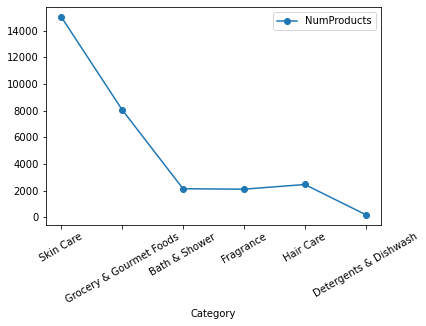

In [17]:
# tạo ra plot line để quan sát rõ hơn về mặt so sánh
df = pd.DataFrame({'Category': num_products_each_category.index,
                   'NumProducts': np.array(num_products_each_category.values)})

df.plot.line(x='Category', y='NumProducts', marker='o' ,rot = 30 );

### Từ 2 câu hỏi trên ta trả lời được câu hỏi lớn là Thị trường thế loại mà Amazon đang muốn hướng tới ?
- 1 Skin Care là thể loại được Amazon bán nhiều nhất và cùng từ đó việc có những Discount nhiều thì có thể thấy Amazon cực kì quan tâm khách hàng như thế nào ở mảng này

### Với các sản phẩm ở mỗi Category, tỉ lệ có hàng tồn kho hay không tính đến thời điểm dữ liệu được thu thập là bao nhiêu?

- Bước 1: Tính tỉ lệ (từ 0 đến 1) có hàng để cung cấp của mỗi thể loại (thể loại ở đây là thể loại trên web Amazon có thể cung cấp, còn cung được hay không cung được là tính tới thời điểm dữ liệu được thu thập)
- Bạn lưu kết quả vào series`stock_availibility_ratio_each_category`, trong đó index là thể loại.
- Bước 2: Từ kết quả ở trên, bạn vẽ đồ thị dạng line, trong đó trục hoành là thể loại và trục tung là tỉ lệ cung cấp được. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Category" và tên trục tung là "StockAvailibilityRatio". Ngoài ra, bạn cũng cần chỉnh miền giá trị của trục tung là từ 0 đến 1.

Bước 1

In [18]:
# group by Stock Availibility theo Category
gb_stock_availibility_category = product_df.groupby(['Category','Stock Availibility']).size()
# đặt tên cho group by ở trên là Total
gb_stock_availibility_category.name = "Total"
# chuyển nó thành dataframe 
df_stock_availibility_category = gb_stock_availibility_category.to_frame()
# tính phần trăm cho tưng cái YES/NO của các thể loại
stock_availibility_ratio_each_category = df_stock_availibility_category.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
# thêm cái index mặc định cho dataframe trên
stock_availibility_ratio_each_category = stock_availibility_ratio_each_category.reset_index()
# chỉ lấy các dòng có giá trị YES ở cột Stock Availibility trong dataframe
stock_availibility_ratio_each_category = stock_availibility_ratio_each_category\
[stock_availibility_ratio_each_category['Stock Availibility']=="YES"]
# đặt cột Category thành index
stock_availibility_ratio_each_category = stock_availibility_ratio_each_category.set_index('Category')
# chỉ lấy cột Total 
stock_availibility_ratio_each_category = stock_availibility_ratio_each_category['Total']

Bước 2

<AxesSubplot:xlabel='Category'>

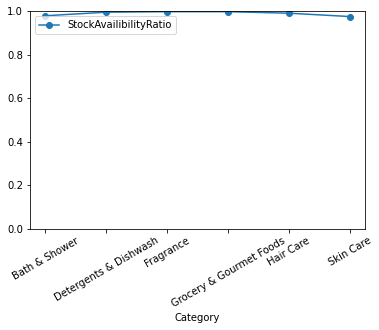

In [19]:
df = pd.DataFrame({'Category': stock_availibility_ratio_each_category.index,
                   'StockAvailibilityRatio': stock_availibility_ratio_each_category.values})

df.plot.line(x='Category', y='StockAvailibilityRatio', marker='o' , ylim = (0,1) ,rot =30)

### Từ câu hỏi cuối có thể thấy dù cho không phải thị trường chình của Amazon nhưng 1 khi đã bán hàng trên Amazon thì mọi thể loại đều có một số lượng hàng tồn kho nhất định để phục vục khách hàng. Quả là sự chuyên nghiệp trong khâu quản lý của Amazon

## 4. Đưa ra câu hỏi có ý nghĩa cần trả lời(2)

- **Câu hỏi của thành viên 2 - Nguyễn Ngọc Uyên Trang - 19127074**
    - Câu hỏi: Cho biết xu hướng bán hàng của các thương hiệu
    - Ý nghĩa: Trong vai trò của người bán hàng, ta cần xác định được mặt hàng mình cần bán là gì, giá bán của mặt hàng đó dao động như thế nào và đang có các thương hiệu nào đang bán mặt hàng đó

## Phân tích dữ liệu để trả lời cho câu hỏi 2

Để trả lời cho câu hỏi này, ta sẽ chia tâp dữ liệu thành 6 phần tương ứng với 6 giá trị khác nhau thuộc cột `Category`. Với mỗi giá trị trong cột `Category`, ta thực hiện như sau:
- Bước 1: Ta cần tìm từ khóa xuất hiện nhiều nhất trong 1000 sản phẩm có giá bán `Price` cao nhất
- Bước 2: Liệt kê các dòng dữ liệu có xuất hiện từ khóa đó,từ đó ta vẽ biểu đồ density thể hiện sự phân bố giá bán của các sản phẩm có tên liên quan đến từ khóa đó và biểu đồ tròn cho biết các thương hiệu bán các sản phẩm đó

In [20]:
#Code bước 1
def most_frequent_word(df, category,top):

    category = df[df['Category'] == category]
    category_top = category.nlargest(top,'Price')
    # đếm số lần xuất hiện của các từ trong cột Product Title và lưu vào biến keyword
    keyword = Counter(" ".join(category_top['Product Title']).split(" ")).items()
    #sắp xếp theo thứ tự giảm dần số lần xuất hiện của các từ trong keyword
    sort_keyword = sorted(keyword, key=lambda f: f[1],reverse = True)
    #Ép kiểu biến sort_keyword từ list of tuple sang dict và lưu vào biến sort_keyword_dict
    sort_keyword_dict = dict(sort_keyword)
    #xóa ký từ ' '(khoảng trắng)
    del sort_keyword_dict['']
    #Các từ khóa quan trọng trong tên của 1 sản phẩm thường sẽ viết hoa chữ cái đầu
    #Vì vậy, ta sẽ lọc các key có ký từ đầu tiên viết hoa và lưu vào biến result 
    result = dict()
    for key,value in sort_keyword_dict.items():
        if(key[0].isupper()):
            result[key]=value
    #Cuối cùng ta được 1 dict chứa các từ khóa có ký từ đầu tiên viết hoa và số lần xuất hiện của nó
    return result


In [21]:
#Code bước 2
def density_plot(cate_df,key):

    # plotting density plot for price using distplot()
    sns.kdeplot(data = cate_df['Price'])
    plt.title('Sự phân bố giá bán của các sản phẩm có liên quan đến '+key,fontsize=20)
    # visualizing plot using matplotlib.pyplot library
    plt.show()

def pie_chart(cate_df,key):
    brand = dict(cate_df['Brand'].value_counts())
    select_5_items = dict(itertools.islice(brand.items(), 5)) 

    fig = plt.figure(figsize =(10, 7))
    plt.pie(select_5_items.values(),labels = select_5_items.keys())
    plt.title('Top 5 thương hiệu của các sản phẩm có liên quan đến '+key,fontsize=20)
    plt.show()
    
def plot_category(df,category,top=1000):
    #word là 1 dict chứa các từ khóa xuất hiện trong tên của 1000 sản phẩm có giá cao nhất
    word = most_frequent_word(df,category,top)
    #key là từ khóa có số lần xuất hiện nhiều nhất, và là key của cặp đầu tiên trong dict word
    first_pair = next(iter((word.items())))
    key = first_pair[0]
    #ta tiến hành liệt kê các dòng dữ liệu có giá trị ở cột Category là category 
    #và trong Product Title có chứa từ khóa key
    cate_df = df[df['Category'] == category]
    cate_df = cate_df[cate_df['Product Title'].str.contains(pat = key)]
    #thực hiện vẽ biểu đồ
    density_plot(cate_df,key)
    pie_chart(cate_df,key)

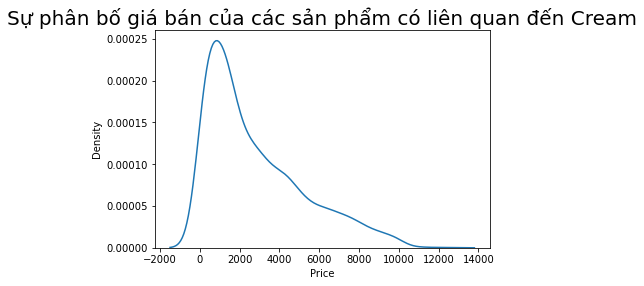

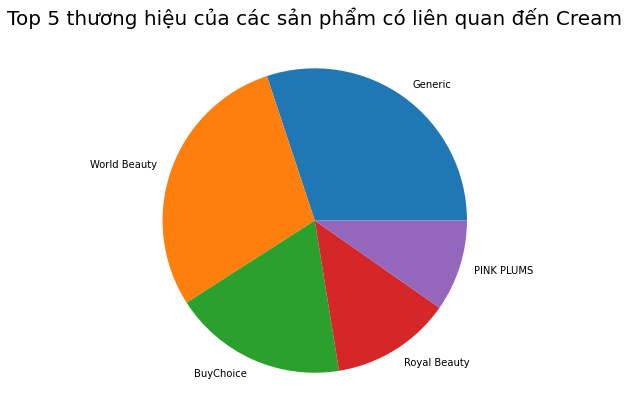

In [22]:
plot_category(product_df,'Skin Care',top=1000)

**Nhận xét**:
Giá bán sản phẩm có liên quan đến từ khóa 'Cream' thuộc nhóm ngành 'Skin Care' dao động từ ~0 đến ~14000 Rupi. Phần lớn sản phẩm có giá khoảng 1000 Rupi

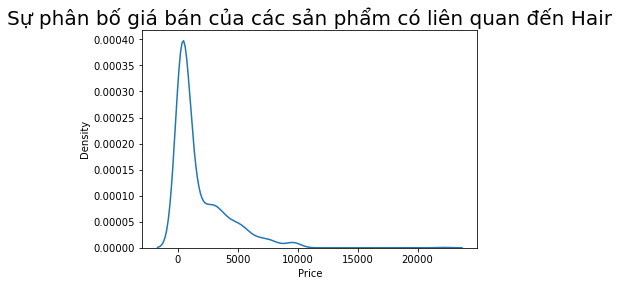

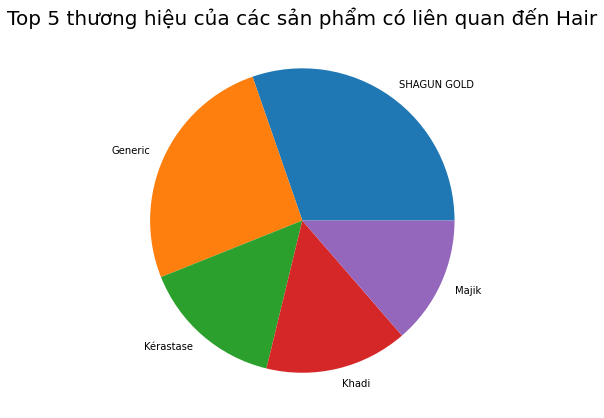

In [23]:
plot_category(product_df,'Hair Care',top=1000)

**Nhận xét**:
Giá bán sản phẩm có liên quan đến từ khóa 'Hảir' thuộc nhóm ngành 'Hair Care' dao động từ ~0 đến ~20000 Rupi. Phần lớn sản phẩm có giá khoảng 1000 Rupi

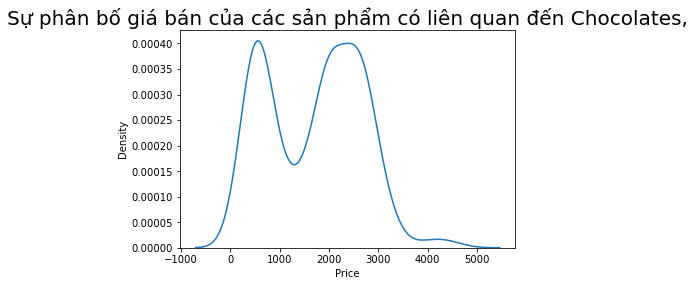

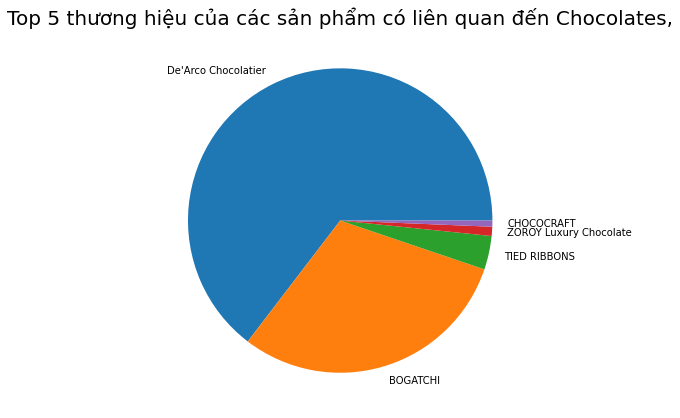

In [24]:
plot_category(product_df,'Grocery & Gourmet Foods',top=1000)

**Nhận xét**:
Giá bán sản phẩm có liên quan đến từ khóa 'Chocolates' thuộc nhóm ngành 'Grocery & Gourmet Foods' dao động từ ~0 đến ~5000 Rupi. Phần lớn sản phẩm có giá khoảng 500 và 2500 Rupi

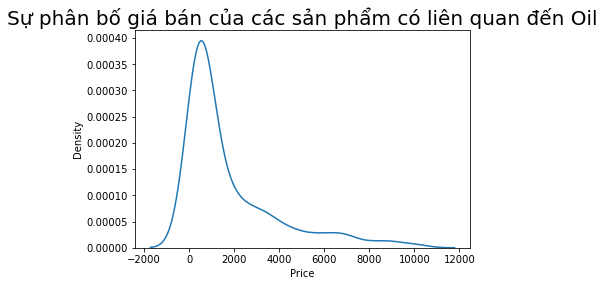

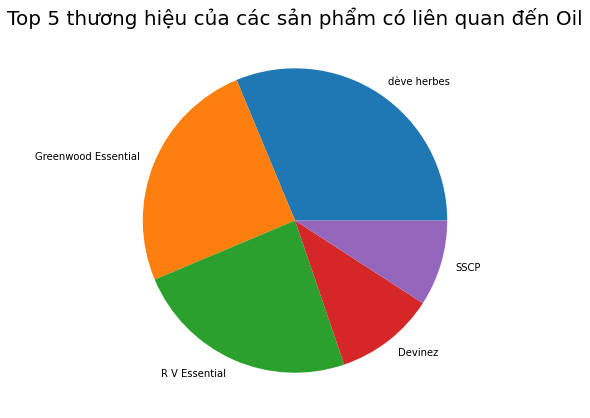

In [25]:
plot_category(product_df,'Bath & Shower',top=1000)

**Nhận xét**:
Giá bán sản phẩm có liên quan đến từ khóa 'Oil' thuộc nhóm ngành 'Bath & Shower' dao động từ ~0 đến ~12000 Rupi. Phần lớn sản phẩm có giá khoảng 1000 Rupi

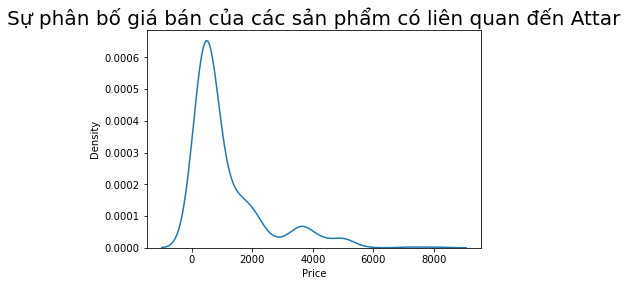

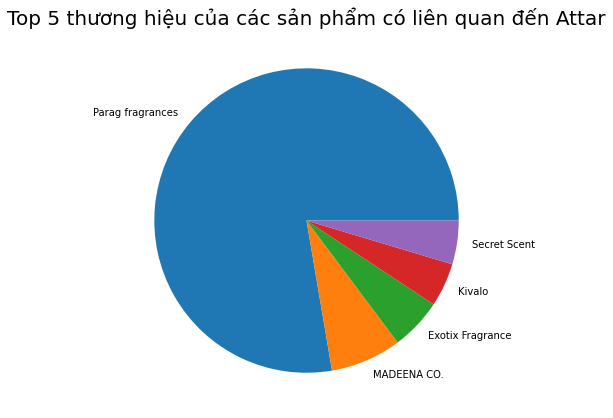

In [26]:
plot_category(product_df,'Fragrance',top=1000)

**Nhận xét**:
Giá bán sản phẩm có liên quan đến từ khóa 'Attar' thuộc nhóm ngành 'Fragrance' dao động từ ~0 đến ~9000 Rupi. Phần lớn sản phẩm có giá khoảng 500 Rupi

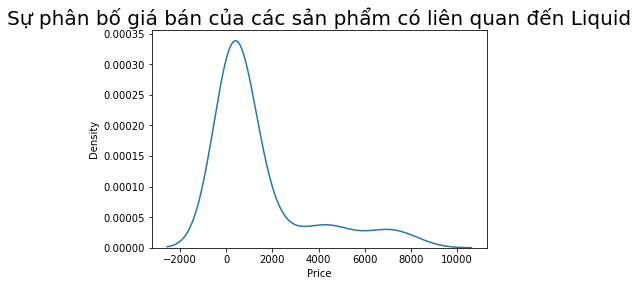

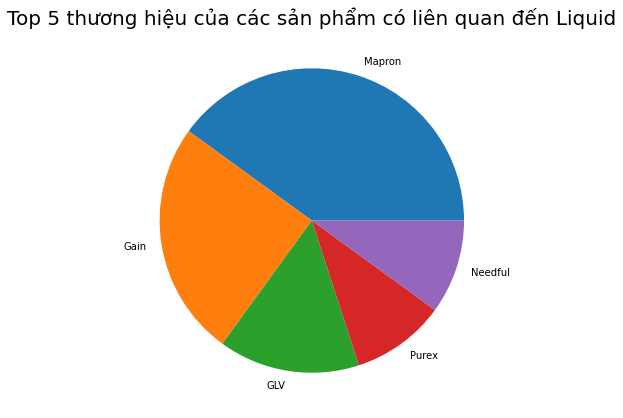

In [27]:
plot_category(product_df,'Detergents & Dishwash',top=1000)

**Nhận xét**:
Giá bán sản phẩm có liên quan đến từ khóa 'Liquid' thuộc nhóm ngành 'Detergents & Dishwash' dao động từ ~0 đến ~10000 Rupi. Phần lớn sản phẩm có giá khoảng 1000 Rupi

#### Nhận xét chung:
Các thương hiệu chiếm thị phần nhiều hơn cả trên trang thương mại điện tử Amazon India đều là các thương hiệu Ấn Độ. Điều này chứng minh người dân Ấn Độ rất tin tưởng sử dụng sản phẩm của đất nước họ. Tuy nhiên với mức giá dao động của mỗi loại sản phẩm là 1000 Rupi và GDP bình quân đầu người của của Ấn Độ năm 2019 là 2101 USD(~156293 Rupi) thì mức giá này khá đắt đỏ so với thu nhập của người dân Ấn Độ

## 5. Nhìn lại

- **Thành viên 1**: Nguyễn Sơn - 19127539
    - Qua đồ án này, em học được: 
        - Biết thêm các hàm của thư viện Pandas
        - Sử dụng Github chuyên nghiệp hơn
        - Teamwork tốt hơn do áp dụng các công cụ thầy đã dạy
    - Em cảm thấy 3 tuần là khoảng thời gian khá khó khăn với em khi không có thời gian tập trung vào đồ án do phải thi cử. Nếu em có thời gian hơn em sẽ đầu tư nghiên cứu kỹ hơn bộ dữ liệu của nhóm

- **Thành viên 2**: Nguyễn Ngọc Uyên Trang - 19127074
    - Qua đồ án này, em học được: 
        - Cách sử dụng Git & Github: thành thạo các câu lệnh git add, git commit, git push và cách chia branch trong Git
        - Học được các bước để phân tích dữ liệu từ tập dữ liệu có sẵn

    - Nếu có thêm thời gian, em sẽ phát triển thêm câu hỏi của mình: "Khi sản phẩm của tôi có từ khóa (ví dụ là Natural) thì giá bán sẽ cao hơn các sản phẩm khác là bao nhiêu %"

## 6. Tài liệu tham khảo

- https://pandas.pydata.org/
- Tài liệu giảng viên cung cấp
- https://solieukinhte.com/gdp-binh-quan-dau-nguoi-cua-an-do/